In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_multi_df_list_p = {}
df_multi_df_list_n = {}
for m in range(1,11):
    ignore_events_threshold = m*0.2
    df_list_p = []
    df_list_n = []
    for i in range(1,26):
        # Read the CSV file into a DataFrame
        file_path = 'arne_03_05/logs_arne_real_03_05_tt1/log'+str(i)+'.txt'

        df = pd.read_csv(file_path, sep='\t')

        # Column to check for changes
        column_to_check = 'Gazing'

        # Filter rows where the column value changes
        df_filtered = df[df[column_to_check] != df[column_to_check].shift()].copy()

        print("\nFiltered DataFrame:")
        print(df_filtered)
        def is_integer_trial(row):
            try:
                int_value = int(row['Trial'])
                return True
            except ValueError:
                return False

        df_filtered['gazing_time'] = df_filtered['Time'].shift(-1) - df_filtered['Time']
        df_filtered_2 = df_filtered[df_filtered.apply(lambda row: is_integer_trial(row),axis=1)].copy()
        df_filtered_3 = df_filtered_2[df_filtered_2['Gazing']!='0'].copy()
        df_filtered_final_p = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])>=ignore_events_threshold,axis=1)].copy()
        df_filtered_final_n = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])<ignore_events_threshold,axis=1)].copy()


        df_list_p.append(df_filtered_final_p)
        df_list_n.append(df_filtered_final_n)
        
    df_multi_df_list_p[str(ignore_events_threshold)]=df_list_p
    df_multi_df_list_n[str(ignore_events_threshold)]=df_list_n



Filtered DataFrame:
          Time               GazeX               GazeY Trial Target Gazing
0    62.309494                  xx                  xx    xx     xx     xx
1    62.331099   104.9128532409668  480.70077024400234     1      6      0
26   64.030120   44.00650119781494  235.42612456530333     1      6      6
34   64.571681  138.15698432922363    157.275228202343     1      6      0
58   66.195844  111.14803504943848   234.1156426370144     1      6      6
65   66.675860  122.01687240600586  242.65001517534256     1      6      0
83   67.882713   108.5639877319336  187.39420384168625     1      6      6
84   67.949495   113.1342601776123  189.03003484010696     1      6      0
85   68.014409  110.56365966796875  188.93336749076843     1      6      6
87   68.146334  117.18878746032715  190.95766550302505     1      6      0
95   68.683632  191.90725708007812  207.53809940814972     1      6      4
96   68.750290   183.6364688873291  200.96538430452347     1      6      0
103 


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    126.677319                   xx                   xx    xx     xx     xx
1    126.687518  -30.733712196350098    330.6010022163391     8      9      0
15   127.643962    351.7576446533203   219.90099151432514     8      9      2
18   127.855296   418.67124366760254    92.53020340204239     8      9      0
22   128.123978    515.8661727905273   133.65228009223938     8      9     13
25   128.326772    473.9623146057129   200.13304442167282     8      9      0
27   128.464701    367.1056137084961   224.34341078996658     8      9      2
30   128.661680   187.09747123718262   210.00729221105576     8      9      0
32   128.795154    31.69020652770996   134.67807215452194     8      9      5
35   128.993187  -163.51021099090576    52.70406657457352     8      9      0
37   129.125700  -269.94276666641235   1.1757232546806335     8      9     15
40   129.328750  -434.57327699661255   -3.8


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    201.492927                   xx                   xx    xx     xx     xx
1    201.499651   1.2949275970458984    335.5990986227989    14     16      0
17   202.617302   232.96965408325195    247.0253364443779    14     16      8
23   203.050570   343.87847900390625    26.58184254169464    14     16      0
24   203.123907   362.31976318359375  -11.777458548545837    14     16     10
34   205.047257   166.51845359802246   -15.81833302974701    14     16      0
35   205.119395    228.8181552886963    41.34214389324188    14     16      8
38   205.335880   138.52966403961182   165.83522522449493    14     16      0
39   205.422824    54.94342803955078   177.70605200529099    14     16      1
42   205.635508  -182.72311449050903   215.04942297935486    14     16      0
43   205.706371   -265.3263487815857   197.07043540477753    14     16     14
45   205.848126   -453.6800494194031   128.


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    312.788047                   xx                   xx    xx     xx     xx
1    312.795396   23.408723831176758   350.99318289756775    23      9      0
16   314.540733   103.26317882537842   250.23536650836468    23      9     16
19   314.745190   -153.3256974220276     89.2720657736063    23      9      0
21   314.894122  -268.29832792282104  -21.565858483314514    23      9     11
25   315.210347  -407.19019746780396  -215.00392413139343    23      9      0
27   315.363899  -289.85422468185425  -263.85126972198486    23      9     15
29   315.502332   -110.6650915145874  -316.79133903980255    23      9     10
33   315.767043   147.04329299926758  -250.94952034950256    23      9      0
34   315.966487   209.10054302215576  -202.90403079986572    23      9     14
39   316.313887    397.1276321411133     76.4614931344986    23      9      1
41   316.460772   414.57293701171875    181


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    126.677319                   xx                   xx    xx     xx     xx
1    126.687518  -30.733712196350098    330.6010022163391     8      9      0
15   127.643962    351.7576446533203   219.90099151432514     8      9      2
18   127.855296   418.67124366760254    92.53020340204239     8      9      0
22   128.123978    515.8661727905273   133.65228009223938     8      9     13
25   128.326772    473.9623146057129   200.13304442167282     8      9      0
27   128.464701    367.1056137084961   224.34341078996658     8      9      2
30   128.661680   187.09747123718262   210.00729221105576     8      9      0
32   128.795154    31.69020652770996   134.67807215452194     8      9      5
35   128.993187  -163.51021099090576    52.70406657457352     8      9      0
37   129.125700  -269.94276666641235   1.1757232546806335     8      9     15
40   129.328750  -434.57327699661255   -3.8

In [3]:
def print_object_attributes(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f"{key}: {value}")
    else:
        for attr in dir(obj):
            if not attr.startswith('__') and not attr.endswith('__'):
                value = getattr(obj, attr)
                print(f"{attr}: {value}")

print_object_attributes(df_multi_df_list_p)

0.2: [          Time               GazeX               GazeY Trial Target Gazing  \
26   64.030120   44.00650119781494  235.42612456530333     1      6      6   
58   66.195844  111.14803504943848   234.1156426370144     1      6      6   
103  69.215764   72.30001831054688  156.69222593307495     1      6      6   
124  70.673367   86.70753765106201  160.68765306472778     1      6      6   

     gazing_time  
26      0.541561  
58      0.480016  
103     0.927229  
124     2.077681  ,          Time                GazeX              GazeY Trial Target Gazing  \
27  76.853346  -220.38433742523193  78.70561856031418     2      7      7   

    gazing_time  
27     2.080725  ,           Time                GazeX                GazeY Trial Target Gazing  \
18   82.141334    299.5631446838379   236.38500268757343     3      4      9   
25   82.607073    75.93846988677979   -31.94855010509491     3      4      2   
29   82.877431  -221.03935432434082   -73.75030446052551     3      4      

1.4000000000000001: [          Time              GazeX               GazeY Trial Target Gazing  \
124  70.673367  86.70753765106201  160.68765306472778     1      6      6   

     gazing_time  
124     2.077681  ,          Time                GazeX              GazeY Trial Target Gazing  \
27  76.853346  -220.38433742523193  78.70561856031418     2      7      7   

    gazing_time  
27     2.080725  ,           Time              GazeX                GazeY Trial Target Gazing  \
133  91.221438  497.9981803894043  -30.994393944740295     3      4      4   

     gazing_time  
133     2.101791  ,          Time                GazeX               GazeY Trial Target Gazing  \
53  99.095644  -211.91431045532227  225.26157760620117     4      6      6   

    gazing_time  
53     2.084227  ,          Time                GazeX                GazeY Trial Target Gazing  \
80  108.85987  -209.65395498275757  -280.10663759708405     5      4      4   

    gazing_time  
80      2.13864  ,        

In [4]:
def count_p(df_list_p):
    count_true_positive = 0
    count_false_positive = 0
    for df in df_list_p:
        c_tp = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        c_fp = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        count_true_positive+= c_tp
        count_false_positive+= c_fp
    return count_true_positive,count_false_positive

def count_n(df_list_n):
    count_true_negative = 0
    count_false_negative = 0
    for df in df_list_n:
        c_tn = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        c_fn = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        count_true_negative+= c_tn
        count_false_negative+= c_fn
    return count_true_negative,count_false_negative

data_for_graph = {
    "Dwelltime":[],
    "count_true_positive":[],
    "count_false_positive":[],
    "count_true_negative":[],
    "count_false_negative":[]
    
}
for m in range(1,11):
    ignore_events_threshold = m*0.2
    count_true_positive,count_false_positive = count_p(df_multi_df_list_p[str(ignore_events_threshold)])
    count_true_negative,count_false_negative = count_n(df_multi_df_list_n[str(ignore_events_threshold)])
    data_for_graph["Dwelltime"].append(str(round(ignore_events_threshold,2)))
    data_for_graph["count_true_positive"].append((count_true_positive/(count_true_positive+count_false_positive))*100)
    data_for_graph["count_false_positive"].append((count_false_positive/(count_true_positive+count_false_positive))*100)
    data_for_graph["count_true_negative"].append((count_true_negative/(count_true_negative+count_false_negative))*100)
    data_for_graph["count_false_negative"].append((count_false_negative/(count_true_negative+count_false_negative))*100)
    




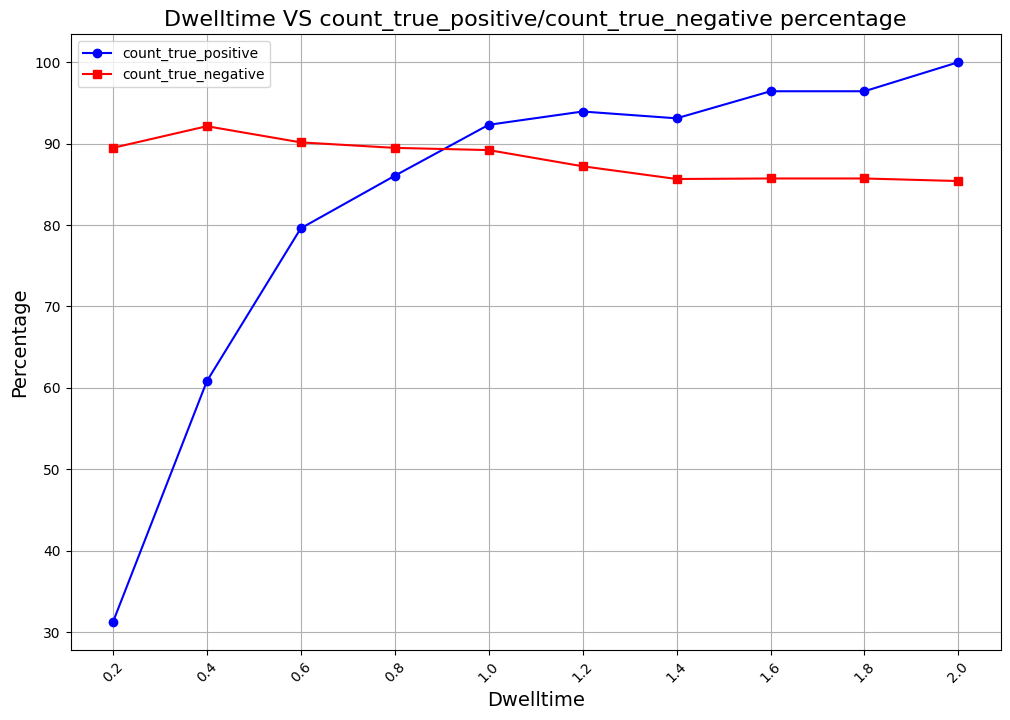

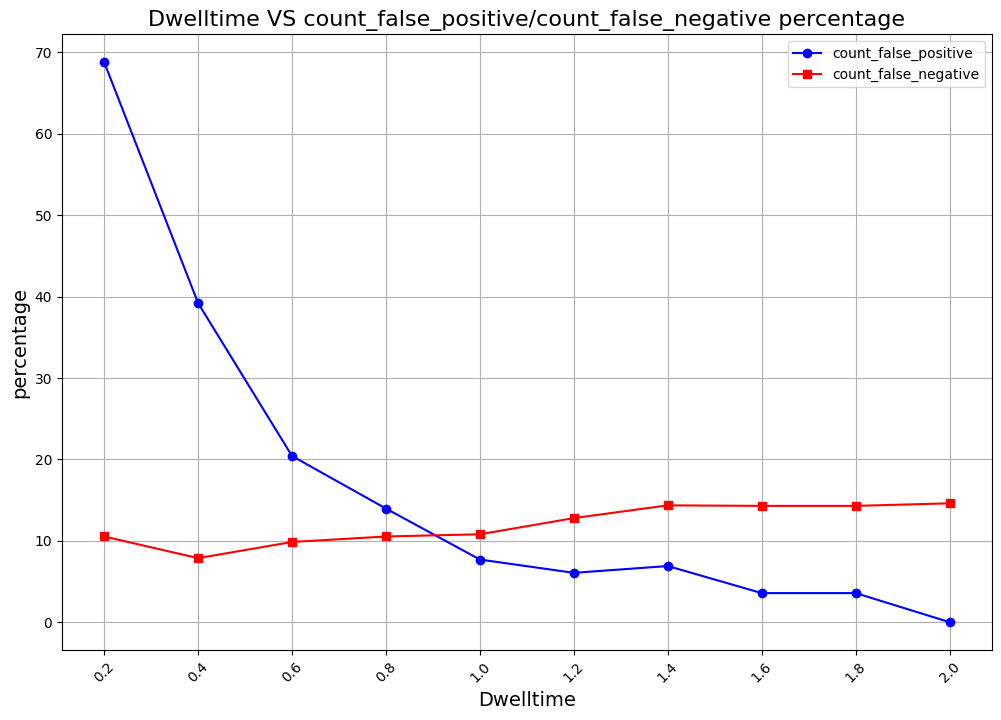

In [7]:
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_positive"], marker='o', linestyle='-', color='b', label='count_true_positive')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_negative"], marker='s', linestyle='-', color='r', label='count_true_negative')

# Adding titles and labels
plt.title('Dwelltime VS count_true_positive/count_true_negative percentage', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_positive"], marker='o', linestyle='-', color='b', label='count_false_positive')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_negative"], marker='s', linestyle='-', color='r', label='count_false_negative')

# Adding titles and labels
plt.title('Dwelltime VS count_false_positive/count_false_negative percentage', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()